In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,2:3] #Glucose
X2 = dataset[:,7:8] #Resistin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,1:2] #BMI
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 8ms/step - loss: 0.7063 - acc: 0.5109 - auc_1: 0.4743 - val_loss: 0.6733 - val_acc: 0.5833 - val_auc_1: 0.6821
Epoch 2/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6824 - acc: 0.5870 - auc_1: 0.5981 - val_loss: 0.6331 - val_acc: 0.6667 - val_auc_1: 0.8429
Epoch 3/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6657 - acc: 0.5435 - auc_1: 0.6552 - val_loss: 0.5970 - val_acc: 0.7917 - val_auc_1: 0.8500
Epoch 4/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6371 - acc: 0.6304 - auc_1: 0.7260 - val_loss: 0.5681 - val_acc: 0.6667 - val_auc_1: 0.8357
Epoch 5/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6051 - acc: 0.6957 - auc_1: 0.7576 - val_loss: 0.5267 - val_acc: 0.7917 - val_auc_1: 0.8429
Epoch 6/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5875 - acc: 0.6739 - auc_1: 0.7650 - val_loss:

92/92 [==============================] - 0s 3ms/step - loss: 0.5035 - acc: 0.7500 - auc_1: 0.8245 - val_loss: 0.5387 - val_acc: 0.7917 - val_auc_1: 0.9000
Epoch 50/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4855 - acc: 0.7609 - auc_1: 0.8505 - val_loss: 0.4646 - val_acc: 0.9167 - val_auc_1: 0.8929
Epoch 51/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5114 - acc: 0.7391 - auc_1: 0.8210 - val_loss: 0.5218 - val_acc: 0.8333 - val_auc_1: 0.9000
Epoch 52/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4960 - acc: 0.7826 - auc_1: 0.8324 - val_loss: 0.6026 - val_acc: 0.7083 - val_auc_1: 0.8964
Epoch 53/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5016 - acc: 0.7283 - auc_1: 0.8321 - val_loss: 0.5331 - val_acc: 0.8333 - val_auc_1: 0.9036
Epoch 54/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4977 - acc: 0.7500 - auc_1: 0.8274 - val_loss: 0.5222 - val_acc: 0.8333 - val_auc_1: 0.9036
Epoch

Epoch 98/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4680 - acc: 0.7935 - auc_1: 0.8479 - val_loss: 0.5012 - val_acc: 0.8750 - val_auc_1: 0.9143
Epoch 99/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4590 - acc: 0.8043 - auc_1: 0.8710 - val_loss: 0.5129 - val_acc: 0.7917 - val_auc_1: 0.9143
Epoch 100/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4534 - acc: 0.8043 - auc_1: 0.8810 - val_loss: 0.5092 - val_acc: 0.8333 - val_auc_1: 0.9071
Epoch 101/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4536 - acc: 0.8152 - auc_1: 0.8760 - val_loss: 0.4987 - val_acc: 0.8750 - val_auc_1: 0.9179
Epoch 102/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4543 - acc: 0.8043 - auc_1: 0.8638 - val_loss: 0.5725 - val_acc: 0.7083 - val_auc_1: 0.9107
Epoch 103/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4441 - acc: 0.8043 - auc_1: 0.8805 - val_loss: 0.5404 - val_acc: 0.7083 - val_au

92/92 [==============================] - 0s 4ms/step - loss: 0.4060 - acc: 0.8261 - auc_1: 0.8971 - val_loss: 0.4590 - val_acc: 0.8333 - val_auc_1: 0.9000
Epoch 147/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4048 - acc: 0.7935 - auc_1: 0.9045 - val_loss: 0.5001 - val_acc: 0.7500 - val_auc_1: 0.9071
Epoch 148/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4057 - acc: 0.8261 - auc_1: 0.9014 - val_loss: 0.4786 - val_acc: 0.7500 - val_auc_1: 0.9000
Epoch 149/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4056 - acc: 0.7935 - auc_1: 0.8988 - val_loss: 0.4386 - val_acc: 0.8750 - val_auc_1: 0.9143
Epoch 150/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4170 - acc: 0.8043 - auc_1: 0.8955 - val_loss: 0.4901 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch 151/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4081 - acc: 0.7935 - auc_1: 0.8990 - val_loss: 0.5195 - val_acc: 0.7500 - val_auc_1: 0.8857


Epoch 194/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3878 - acc: 0.8261 - auc_1: 0.9076 - val_loss: 0.5669 - val_acc: 0.7500 - val_auc_1: 0.8857
Epoch 195/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3718 - acc: 0.8478 - auc_1: 0.9219 - val_loss: 0.5137 - val_acc: 0.7083 - val_auc_1: 0.8857
Epoch 196/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3878 - acc: 0.8152 - auc_1: 0.9098 - val_loss: 0.5444 - val_acc: 0.7083 - val_auc_1: 0.8821
Epoch 197/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3823 - acc: 0.8478 - auc_1: 0.9124 - val_loss: 0.4950 - val_acc: 0.7917 - val_auc_1: 0.8750
Epoch 198/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3761 - acc: 0.8370 - auc_1: 0.9160 - val_loss: 0.4718 - val_acc: 0.8750 - val_auc_1: 0.8929
Epoch 199/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3601 - acc: 0.8261 - auc_1: 0.9190 - val_loss: 0.5578 - val_acc: 0.7500 - val_

92/92 [==============================] - 0s 4ms/step - loss: 0.3225 - acc: 0.8370 - auc_1: 0.9383 - val_loss: 0.4866 - val_acc: 0.8750 - val_auc_1: 0.9036
Epoch 243/700
92/92 [==============================] - 0s 5ms/step - loss: 0.3093 - acc: 0.8478 - auc_1: 0.9433 - val_loss: 0.4621 - val_acc: 0.9167 - val_auc_1: 0.9071
Epoch 244/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3001 - acc: 0.8696 - auc_1: 0.9469 - val_loss: 0.4700 - val_acc: 0.8750 - val_auc_1: 0.9071
Epoch 245/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3035 - acc: 0.8587 - auc_1: 0.9426 - val_loss: 0.4818 - val_acc: 0.8750 - val_auc_1: 0.9071
Epoch 246/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3054 - acc: 0.8913 - auc_1: 0.9390 - val_loss: 0.5381 - val_acc: 0.8750 - val_auc_1: 0.8893
Epoch 247/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3151 - acc: 0.8587 - auc_1: 0.9398 - val_loss: 0.5310 - val_acc: 0.8750 - val_auc_1: 0.8857


92/92 [==============================] - 0s 3ms/step - loss: 0.2654 - acc: 0.8587 - auc_1: 0.9571 - val_loss: 0.5619 - val_acc: 0.8333 - val_auc_1: 0.8821
Epoch 291/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2707 - acc: 0.8804 - auc_1: 0.9590 - val_loss: 0.4763 - val_acc: 0.9167 - val_auc_1: 0.8821
Epoch 292/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2714 - acc: 0.8478 - auc_1: 0.9588 - val_loss: 0.4529 - val_acc: 0.9167 - val_auc_1: 0.8964
Epoch 293/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2641 - acc: 0.8696 - auc_1: 0.9586 - val_loss: 0.5280 - val_acc: 0.8333 - val_auc_1: 0.8821
Epoch 294/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2720 - acc: 0.8696 - auc_1: 0.9602 - val_loss: 0.4641 - val_acc: 0.9167 - val_auc_1: 0.8821
Epoch 295/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2560 - acc: 0.8804 - auc_1: 0.9631 - val_loss: 0.4236 - val_acc: 0.9167 - val_auc_1: 0.9250


92/92 [==============================] - 0s 4ms/step - loss: 0.2458 - acc: 0.8696 - auc_1: 0.9648 - val_loss: 0.5237 - val_acc: 0.8333 - val_auc_1: 0.8857
Epoch 339/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2356 - acc: 0.8913 - auc_1: 0.9690 - val_loss: 0.4581 - val_acc: 0.9167 - val_auc_1: 0.8857
Epoch 340/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2276 - acc: 0.8913 - auc_1: 0.9693 - val_loss: 0.5268 - val_acc: 0.8333 - val_auc_1: 0.8857
Epoch 341/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2198 - acc: 0.9022 - auc_1: 0.9707 - val_loss: 0.4999 - val_acc: 0.8333 - val_auc_1: 0.8821
Epoch 342/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2271 - acc: 0.8696 - auc_1: 0.9719 - val_loss: 0.5023 - val_acc: 0.8333 - val_auc_1: 0.8821
Epoch 343/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2193 - acc: 0.8587 - auc_1: 0.9681 - val_loss: 0.4712 - val_acc: 0.8750 - val_auc_1: 0.8893


92/92 [==============================] - 0s 4ms/step - loss: 0.2115 - acc: 0.8913 - auc_1: 0.9710 - val_loss: 0.5474 - val_acc: 0.8750 - val_auc_1: 0.8893
Epoch 387/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1739 - acc: 0.9130 - auc_1: 0.9831 - val_loss: 0.5104 - val_acc: 0.8750 - val_auc_1: 0.8821
Epoch 388/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1921 - acc: 0.9348 - auc_1: 0.9793 - val_loss: 0.5096 - val_acc: 0.8750 - val_auc_1: 0.8893
Epoch 389/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1872 - acc: 0.9130 - auc_1: 0.9793 - val_loss: 0.4767 - val_acc: 0.8750 - val_auc_1: 0.8964
Epoch 390/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1814 - acc: 0.9239 - auc_1: 0.9819 - val_loss: 0.5579 - val_acc: 0.8750 - val_auc_1: 0.8679
Epoch 391/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2153 - acc: 0.9022 - auc_1: 0.9695 - val_loss: 0.5455 - val_acc: 0.8333 - val_auc_1: 0.8893


Epoch 434/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1608 - acc: 0.9130 - auc_1: 0.9831 - val_loss: 0.6310 - val_acc: 0.8333 - val_auc_1: 0.8536
Epoch 435/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1603 - acc: 0.9457 - auc_1: 0.9852 - val_loss: 0.6034 - val_acc: 0.8333 - val_auc_1: 0.8571
Epoch 436/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1715 - acc: 0.9022 - auc_1: 0.9800 - val_loss: 0.6008 - val_acc: 0.8333 - val_auc_1: 0.8643
Epoch 437/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1695 - acc: 0.9239 - auc_1: 0.9829 - val_loss: 0.5883 - val_acc: 0.8750 - val_auc_1: 0.8893
Epoch 438/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1792 - acc: 0.8913 - auc_1: 0.9779 - val_loss: 0.6474 - val_acc: 0.8333 - val_auc_1: 0.8500
Epoch 439/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1699 - acc: 0.8913 - auc_1: 0.9807 - val_loss: 0.6510 - val_acc: 0.8333 - val_

92/92 [==============================] - 0s 3ms/step - loss: 0.1681 - acc: 0.9022 - auc_1: 0.9819 - val_loss: 0.7327 - val_acc: 0.8333 - val_auc_1: 0.8250
Epoch 483/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1342 - acc: 0.9457 - auc_1: 0.9907 - val_loss: 0.6171 - val_acc: 0.8333 - val_auc_1: 0.8607
Epoch 484/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1399 - acc: 0.9348 - auc_1: 0.9890 - val_loss: 0.6995 - val_acc: 0.8333 - val_auc_1: 0.8357
Epoch 485/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1320 - acc: 0.9457 - auc_1: 0.9905 - val_loss: 0.7424 - val_acc: 0.8333 - val_auc_1: 0.8429
Epoch 486/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1431 - acc: 0.9348 - auc_1: 0.9869 - val_loss: 0.6408 - val_acc: 0.8333 - val_auc_1: 0.8679
Epoch 487/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1373 - acc: 0.9348 - auc_1: 0.9886 - val_loss: 0.6967 - val_acc: 0.8333 - val_auc_1: 0.8464


92/92 [==============================] - 0s 3ms/step - loss: 0.1137 - acc: 0.9348 - auc_1: 0.9933 - val_loss: 0.7850 - val_acc: 0.8333 - val_auc_1: 0.8286
Epoch 531/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1464 - acc: 0.9348 - auc_1: 0.9860 - val_loss: 0.6595 - val_acc: 0.8333 - val_auc_1: 0.8679
Epoch 532/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1369 - acc: 0.9348 - auc_1: 0.9862 - val_loss: 0.7525 - val_acc: 0.8333 - val_auc_1: 0.8464
Epoch 533/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1072 - acc: 0.9348 - auc_1: 0.9943 - val_loss: 0.7716 - val_acc: 0.8333 - val_auc_1: 0.8179
Epoch 534/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1087 - acc: 0.9348 - auc_1: 0.9943 - val_loss: 0.8182 - val_acc: 0.8333 - val_auc_1: 0.8143
Epoch 535/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1152 - acc: 0.9565 - auc_1: 0.9933 - val_loss: 0.7550 - val_acc: 0.7917 - val_auc_1: 0.8214


92/92 [==============================] - 0s 4ms/step - loss: 0.0887 - acc: 0.9565 - auc_1: 0.9964 - val_loss: 0.9316 - val_acc: 0.7917 - val_auc_1: 0.8214
Epoch 579/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0969 - acc: 0.9348 - auc_1: 0.9952 - val_loss: 0.9043 - val_acc: 0.7917 - val_auc_1: 0.8071
Epoch 580/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0914 - acc: 0.9457 - auc_1: 0.9962 - val_loss: 0.9242 - val_acc: 0.7917 - val_auc_1: 0.8143
Epoch 581/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0888 - acc: 0.9565 - auc_1: 0.9976 - val_loss: 0.8984 - val_acc: 0.8333 - val_auc_1: 0.8214
Epoch 582/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0967 - acc: 0.9565 - auc_1: 0.9955 - val_loss: 0.7892 - val_acc: 0.7917 - val_auc_1: 0.8321
Epoch 583/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2044 - acc: 0.9239 - auc_1: 0.9757 - val_loss: 0.8210 - val_acc: 0.7917 - val_auc_1: 0.8286


92/92 [==============================] - 0s 5ms/step - loss: 0.1369 - acc: 0.9457 - auc_1: 0.9893 - val_loss: 1.0268 - val_acc: 0.7917 - val_auc_1: 0.7857
Epoch 627/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0749 - acc: 0.9674 - auc_1: 0.9986 - val_loss: 1.0352 - val_acc: 0.7917 - val_auc_1: 0.7893
Epoch 628/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0714 - acc: 0.9783 - auc_1: 0.9986 - val_loss: 1.0287 - val_acc: 0.7917 - val_auc_1: 0.7929
Epoch 629/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0731 - acc: 0.9674 - auc_1: 0.9986 - val_loss: 1.0445 - val_acc: 0.7917 - val_auc_1: 0.7893
Epoch 630/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0744 - acc: 0.9674 - auc_1: 0.9981 - val_loss: 1.0402 - val_acc: 0.7917 - val_auc_1: 0.7929
Epoch 631/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0717 - acc: 0.9783 - auc_1: 0.9981 - val_loss: 1.0753 - val_acc: 0.7917 - val_auc_1: 0.7893


92/92 [==============================] - 0s 4ms/step - loss: 0.0891 - acc: 0.9783 - auc_1: 0.9952 - val_loss: 1.2192 - val_acc: 0.7917 - val_auc_1: 0.7321
Epoch 675/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0551 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 1.2788 - val_acc: 0.7500 - val_auc_1: 0.7429
Epoch 676/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0575 - acc: 0.9783 - auc_1: 0.9986 - val_loss: 1.1935 - val_acc: 0.7917 - val_auc_1: 0.7321
Epoch 677/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0600 - acc: 0.9783 - auc_1: 0.9986 - val_loss: 1.1664 - val_acc: 0.7917 - val_auc_1: 0.7536
Epoch 678/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0746 - acc: 0.9783 - auc_1: 0.9976 - val_loss: 0.8138 - val_acc: 0.7500 - val_auc_1: 0.8000
Epoch 679/700
92/92 [==============================] - 0s 5ms/step - loss: 0.2325 - acc: 0.9022 - auc_1: 0.9721 - val_loss: 1.0481 - val_acc: 0.7083 - val_auc_1: 0.7929


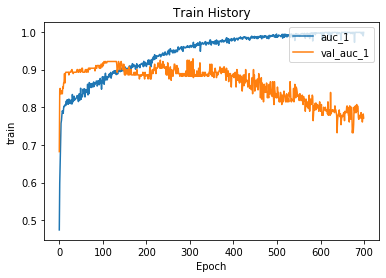

[array([[-1.280031  ,  1.7580434 , -1.0921336 , -1.7335182 , -1.1600808 ,
         1.3465593 , -1.6172749 , -0.21996279, -1.5606357 ],
       [-1.1149745 ,  0.4701465 , -2.4556081 , -0.47053623,  0.68733275,
         2.385672  ,  0.49966025, -4.664174  , -1.6099756 ],
       [-0.17843229,  0.45320007,  1.0853966 , -0.18484613,  0.13555811,
        -0.9522879 ,  0.92848796, -0.33556473, -0.7544151 ],
       [ 0.26942462,  0.5935307 , -0.33772886,  0.77931035, -1.1229202 ,
         0.29209504,  0.43082225,  0.0559262 ,  0.49134916]],
      dtype=float32), array([ 0.34604126, -1.0453495 ,  0.2944727 ,  0.06270727,  0.57539505,
       -0.12124963, -0.28877434,  0.38464785,  0.37304947], dtype=float32), array([[-1.2405833 , -0.98503315,  0.2797885 , -0.9722844 ,  0.40160432,
         1.0334196 ,  0.7489479 , -0.100906  ,  1.0447472 ],
       [ 1.0786949 ,  1.7569364 ,  0.5611004 ,  4.525784  ,  1.0030881 ,
        -1.5247414 , -0.36181912,  4.6181984 , -2.308481  ],
       [-1.3668853 , -0.

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4])
print(predictions)

[[1.6638871e-03]
 [6.3804638e-01]
 [5.7693923e-01]
 [5.6629167e-05]
 [1.8425168e-02]
 [9.9765468e-01]
 [9.8086530e-01]
 [9.9719858e-01]
 [9.9695671e-01]
 [9.9918085e-01]
 [1.6239147e-03]
 [8.6265296e-05]
 [9.9409431e-01]
 [1.2407344e-02]
 [4.5595273e-02]
 [9.9895382e-01]
 [3.3539855e-01]
 [9.6993881e-01]
 [9.9907351e-01]
 [9.9916887e-01]
 [6.6971764e-02]
 [3.7602931e-02]
 [2.0759315e-03]
 [9.9842715e-01]
 [9.9998617e-01]
 [9.9936575e-01]
 [9.9046397e-01]
 [9.8824358e-01]
 [6.3214429e-02]
 [9.9999475e-01]
 [1.3730821e-02]
 [3.2213502e-02]
 [4.0182348e-02]
 [2.9811775e-02]
 [5.4353706e-05]
 [9.9915981e-01]
 [9.9998260e-01]
 [9.8611891e-01]
 [9.8263377e-01]
 [9.9862528e-01]
 [9.9301827e-01]
 [9.9894124e-01]
 [4.5232349e-03]
 [5.7345517e-02]
 [1.7415622e-03]
 [6.0985333e-01]
 [9.9365377e-01]
 [9.9724883e-01]
 [9.4346225e-01]
 [1.3226735e-02]
 [3.6890972e-03]
 [9.8758358e-01]
 [6.5683314e-05]
 [4.9392773e-05]
 [2.7206822e-04]
 [9.5250390e-02]
 [5.4098405e-02]
 [9.9960321e-01]
 [5.4826651e-0